## About Dataset
**Source:**

The dataset was created by Angeliki Xifara (angxifara '@' gmail.com, Civil/Structural Engineer) and was processed by Athanasios Tsanas (tsanasthanasis '@' gmail.com, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

**Data Set Information:**

We perform energy analysis using 12 different building shapes simulated in Ecotect (*Ecotect Software has been used to calculate building's energy consumption by simulating its context within the environment.*). The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

**Attribute Information:**

The dataset contains eight attributes (or features, denoted by X1…X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

**Specifically:**

X1 Relative Compactness

X2 Surface Area

X3 Wall Area

X4 Roof Area

X5 Overall Height

X6 Orientation

X7 Glazing Area

X8 Glazing Area Distribution

y1 Heating Load

y2 Cooling Load


**PROBLEM STATEMENT**

Electrical energy consumption has been increasing over the years as more entities are  being electricified day by day. Statistics show that 1/3rd of the energy produced are consumed by  Buildings, where people spend most of their time. With increasing demand in energy globally, there is need for efficient use of the energy supplied especially in buildings.

**TECHNICAL OBJECTIVE**

Develop a machine learning model to predict cooling energy consumption in residential buildings.

**TECHNICAL IMPLICATIOSN OF USING HEATING AND COOLING ENERGY CONSUMPTION PREDICTION MODEL**

The use of predictive models for energy consumption can help in optimal sizing of the cooling and heating system in a building thereby improving energy efficiency.

- **Energy Savings**: Properly sized heating/cooling systems operate at higher efficiencies, resulting in energy savings and reduced operating costs.

- **Reduced Wear and Tear**: Oversized systems often cycle on and off more frequently, which can lead to increased wear and tear on equipment. Right-sizing prevents this issue.

- **Comfort**: Systems that are too large may lead to temperature swings and discomfort for occupants. Predictive modeling can help avoid this by ensuring that the system is appropriately sized to maintain consistent comfort.

**ML/DS Goals**

- Identify missing values and outliers
- Explore the data using histogram, boxplots, and barcharts visualizations
- Identify important features through univariate and multivariate analysis
- Apply Feature Engineering to prepare data for modelling
- Build Model
- Evaluation of model perfromance
- Testing of models





## 1. LOAD ENERGY DATASET

In [ ]:
#import libraries

#libraries for data manipulation
import pandas as pd
import numpy as np
import os
#libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

#libraries for feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

#libraries for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

#libraries for modeling

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

# library for downloading data
import kagglehub

In [ ]:
data_path = ''
while data_path != '/kaggle/input/eergy-efficiency-dataset':
    print("Downloading data...")
    data_path = kagglehub.dataset_download('elikplim/eergy-efficiency-dataset')

print(data_path)
print('Data source import complete.')

/kaggle/input/eergy-efficiency-dataset
Data source import complete.


In [ ]:
print(os.listdir(data_path))
data_file = os.path.join(data_path, 'ENB2012_data.csv')
print(data_file)
%cp /kaggle/input/eergy-efficiency-dataset/ENB2012_data.csv /content

['ENB2012_data.csv']
/kaggle/input/eergy-efficiency-dataset/ENB2012_data.csv


In [ ]:
#read data into dataframe
df_energy=pd.read_csv("/content/ENB2012_data.csv")

#view the five first row of the data
df_energy.head()
print(df_energy['Y2'].mean)

<bound method Series.mean of 0      21.33
1      21.33
2      21.33
3      21.33
4      28.28
       ...  
763    21.40
764    16.88
765    17.11
766    16.61
767    16.03
Name: Y2, Length: 768, dtype: float64>


**Observations**

There are 8 features in the dataset and they are labelled `X1` to ` X8 ` and 2 target variables , `Y1` and `Y2`.
There are 768 samples in the dataset. There are only continuous varibales in the dataset, no noticeable categorical variable(s).

**Action**

For analysis and modeling purpose, the features and targets will be renamed for proper identification.

In [ ]:
#rename features and targets

df_energy.rename(columns={"X1": "Relative Compactness", "X2" :"Surface Area" ,"X3": "Wall Area","X4": "Roof Area", "X5":"Overall Height","X6" :"Orientation","X7": "Glazing Area","X8" : "Glazing Area Distribution","Y1": "Heating Load","Y2": "Cooling Load"},inplace=True)



#get the info of the data
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


There seems to be no missing value in the dataset and the datatypes of the variables are all numerical.

In [ ]:
#checking for missing values in each column of the dataset
df_energy.isnull().sum()

,0
Relative Compactness,0
Surface Area,0
Wall Area,0
Roof Area,0
Overall Height,0
Orientation,0
Glazing Area,0
Glazing Area Distribution,0
Heating Load,0
Cooling Load,0


As suspected from the info of the dataset, there are no missing values in the dataset.

In [ ]:
#Get the unique values in each column
df_energy.nunique()

,0
Relative Compactness,12
Surface Area,12
Wall Area,7
Roof Area,4
Overall Height,2
Orientation,4
Glazing Area,4
Glazing Area Distribution,6
Heating Load,586
Cooling Load,636


The `surface area` of the dataset has only 12 unique values, this means that there are only 12 different building shape. All of these 12 building shapes can have any of the 7 `Wall Area` and 4 `Roof Area` amongst other properties. Different combination of these unique variables gave rise to the 768 examples.

### 2. EXPLORATORY DATA ANALYSIS

It involves examining and visualizing a dataset to understand its structure, characteristics, and patterns.

- Descriptive Statitics

 These statistics provide a simple way to understand and interpret data, allowing you to gain insights into the data's

     - central tendencies
     - variability
     - distribution
     - shape
- Univariate and Multivariate Analysis using Visualization

  Create visualizations like histograms, box plots, scatter plots, and bar charts to explore
  
    *       distribution of the data
    *       identify outliers  
    *       understand the relationships between variables.
      
- Data Preparation

  This involves preparing the data for modelling
   * Data Transformation
   * Feature selection
   



In [ ]:
# get descriptive statistics summary for each feature
df_energy.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


From the descriptive statistics of the dataset, it is observed that the spread  or variation of the data is small as the mean values and median values are quite close in figures.

There are some buildings with no glazing area as the minimum shows 0. This scenario is quite unusual in residential construction because windows and other glazed openings are essential for ventilation and natural lighting.

The building cooling and heating load have almost the same distribution, their `mean`, `std`, `25%`, `median` and `max` values are close to another

All of these observation can be better visualized with plots.

N.B=> Glazing area is any portion of the building covered with glass or a transparent material, can be window or door of the building.


In [ ]:
#get the summary statitics for buildings with no glazing area
df_energy[df_energy["Glazing Area"]==0].describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.0,48.000000,48.000000
mean,0.764167,671.708333,318.500000,176.604167,5.250000,3.500000,0.0,0.0,14.286458,19.706250
std,0.106827,88.960297,44.059438,45.614184,1.768519,1.129865,0.0,0.0,7.625241,8.134356
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.0,0.0,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.500000,2.750000,0.0,0.0,7.037500,12.047500
50%,0.750000,673.750000,318.500000,183.750000,5.250000,3.500000,0.0,0.0,13.200000,18.980000
75%,0.830000,741.125000,343.000000,220.500000,7.000000,4.250000,0.0,0.0,19.747500,25.860000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.0,0.0,29.900000,39.440000


There are about 48 houses with no glazing area, the features have almost the same distribution as the overall dataset

### A. Univariate Analysis

In [ ]:
def box_plots(
    *,
    data: pd.DataFrame,
    features: list,
    n_rows: int,
    n_cols: int,
    figsize: tuple = (15, 8),
) -> "Plot":
    """This returns a box plot of all the specified features."""
    while n_rows*n_cols < len(features):
        n_rows+=1

    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)
    for idx, feat in enumerate(features):
        if n_rows > 1:
            ax = axs[(idx // n_cols), (idx % n_cols)]
        else:
            ax = axs[idx]

        sns.boxplot(data=data, x=feat, ax=ax)
        ax.set_title(f"Box Plot of {feat!r}")

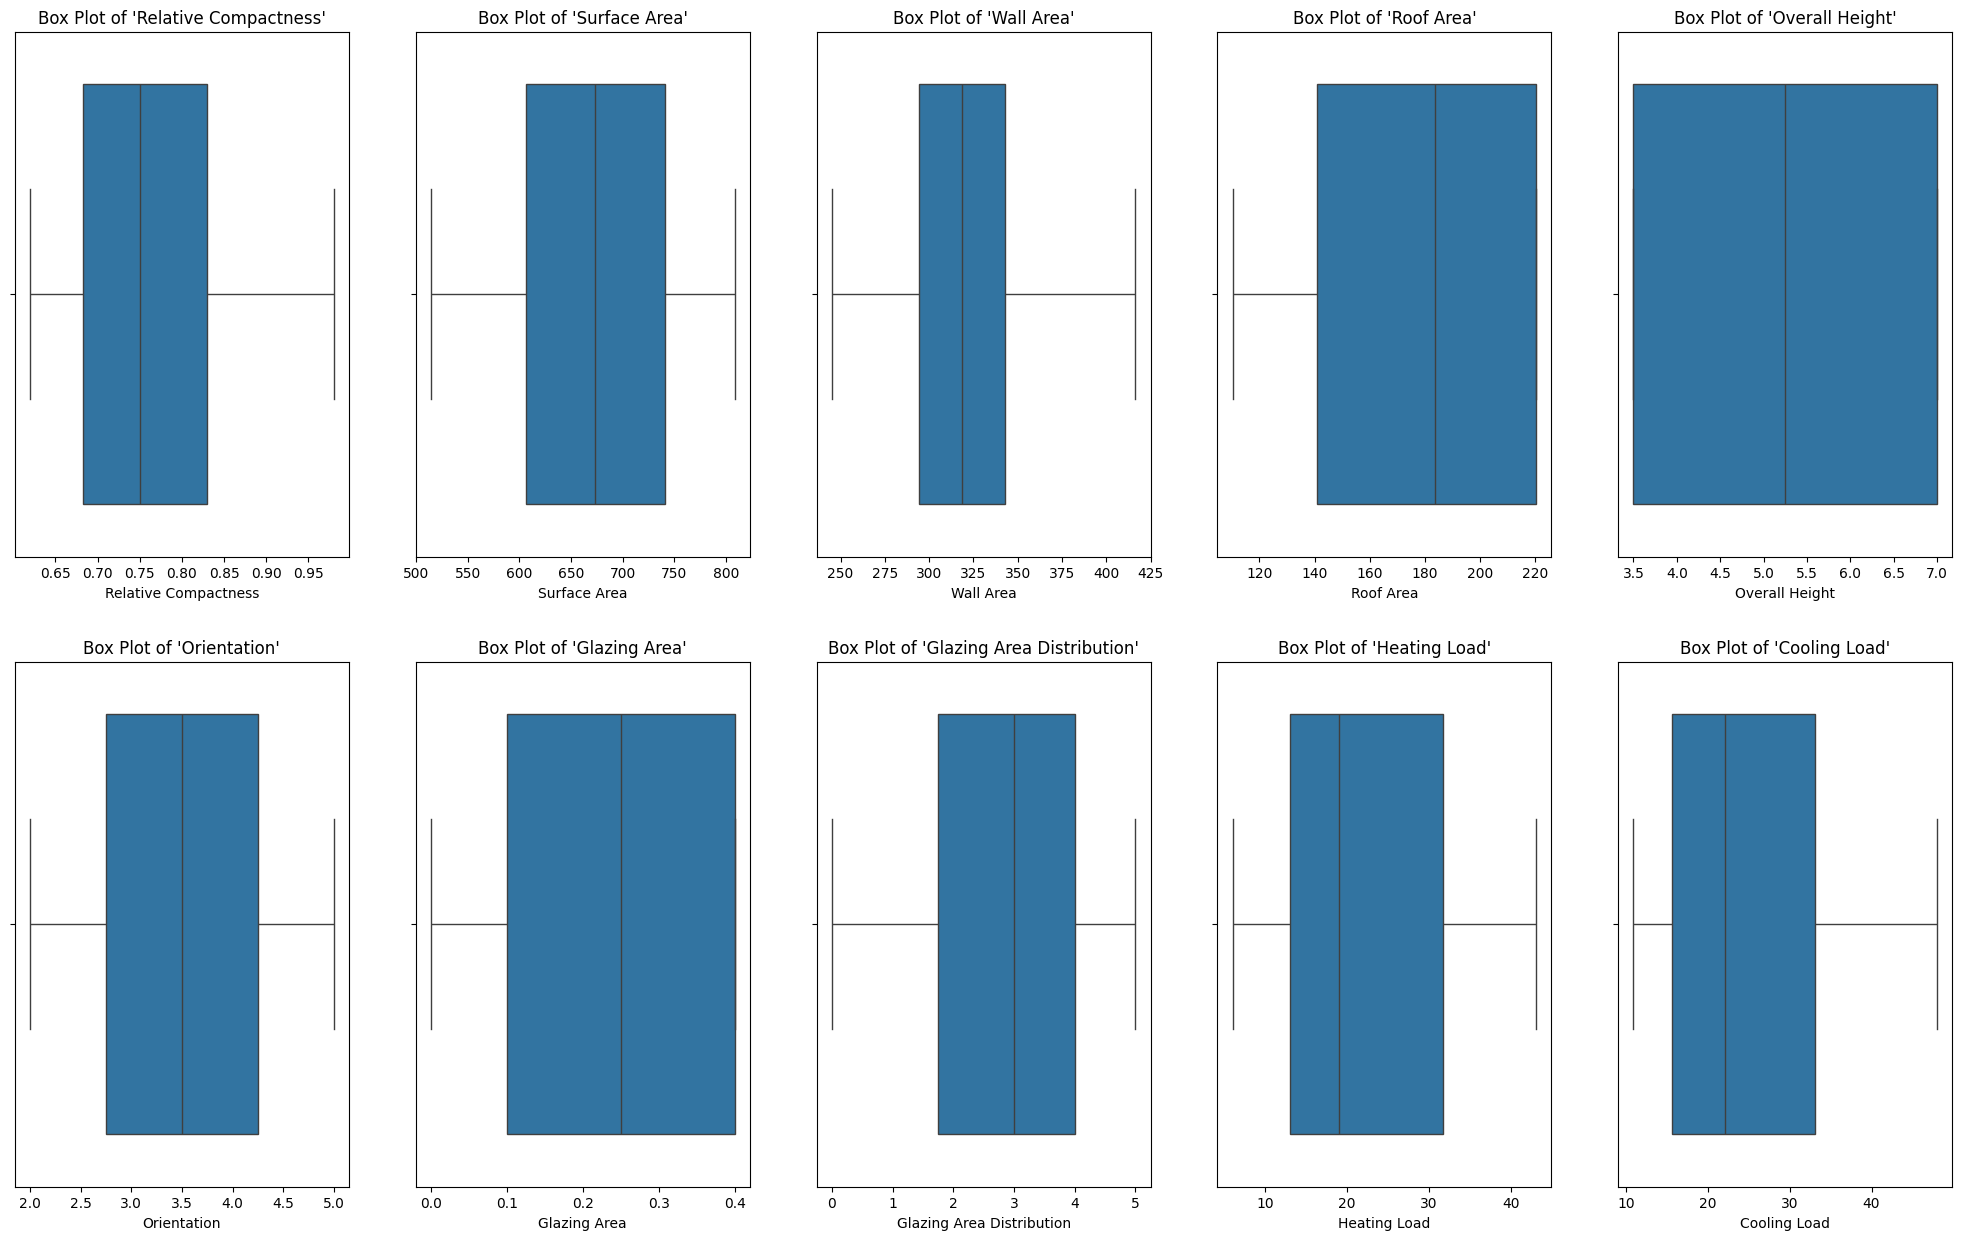

In [ ]:
box_plots(data=df_energy,features=df_energy.columns,n_rows=2, n_cols=5, figsize=(25,15))

The boxplots shows that there are no outliers in the features of this dataset.




In [ ]:
#plot the histogram of the features to see the didtribution of their values

def Hist_plots(
    *,
    data: pd.DataFrame,
    features: list,
    n_rows: int,
    n_cols: int,
    figsize: tuple = (15, 8),
) -> "Plot":
    """This returns a box plot of all the specified features."""
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)

    for idx, feat in enumerate(features):
        if n_rows > 1:
            ax = axs[(idx // n_cols), (idx % n_cols)]
        else:
            ax = axs[idx]

        sns.histplot(data=data, x=feat, ax=ax)
        ax.set_title(f"Hist Plot of {feat!r}")

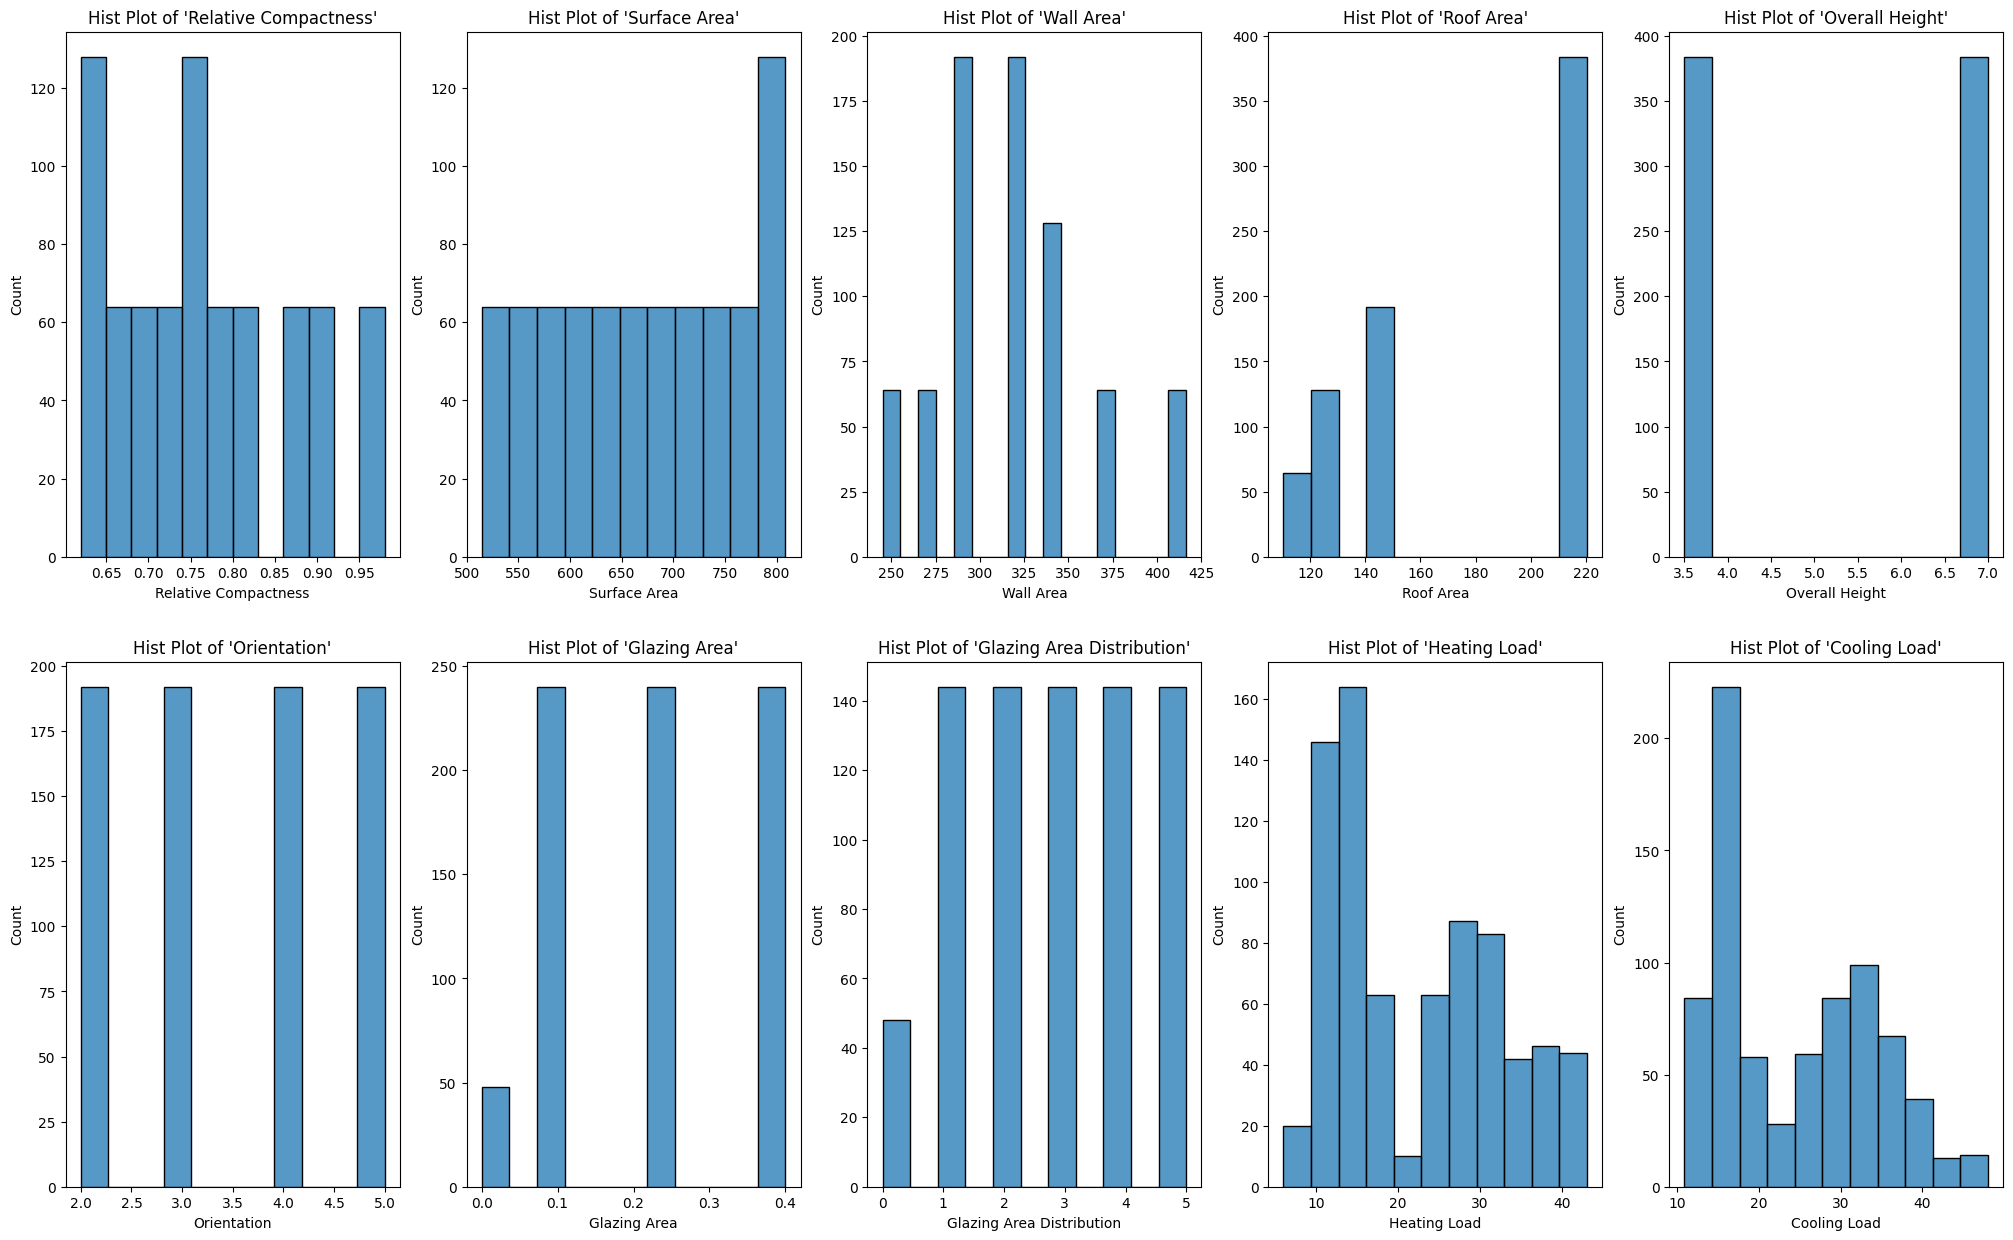

In [ ]:
#plotting the histogram distribution for the features
Hist_plots(data=df_energy,features=df_energy.columns,n_rows=2, n_cols=5, figsize=(25,15))

**Key Observations**
- Some of the features have values with equal distribution of values, i.e `Overall Height`, `Orientation`
- The `Orientation` might be a categorical variables as it has only 4 unique values since Orientation of a building usually mean the position of that building with respect to the north
- Most of the buildings have glazing area between 0.1 and 0.4 unit squares
- The Heating Load and Cooling Load are postively skewed.

**Insights**
- All the buildings have height of either 3.5 or 7, this might mean the buildings are either a storey  or bungalow.
- The buildings can have one of 4 orientation/position.

In [ ]:
#skewness of target variable
print("Skewness of Heating Load: %f" % df_energy['Heating Load'].skew())
print("Skewness of Cooling Load: %f" % df_energy['Cooling Load'].skew())


Skewness of Heating Load: 0.360449
Skewness of Cooling Load: 0.395992


Skewness quantifies the direction and degree of asymmetry in a distribution, where positive skewness (greater than 0) indicates a right-skewed distribution, and negative skewness (less than 0) indicates a left-skewed distribution. In a right-skewed distribution, the right tail is longer, and in a left-skewed distribution, the left tail is longer.

The target variable is skewed to the right by 0.4 approximately.

In [ ]:
#get the percentage of each class in the Orientation feature.

df_energy["Orientation"].value_counts(normalize=True)

,proportion
Orientation,
2,0.25
3,0.25
4,0.25
5,0.25


In [ ]:
df_energy["Glazing Area Distribution"].value_counts(normalize=True)

,proportion
Glazing Area Distribution,
1,0.1875
2,0.1875
4,0.1875
3,0.1875
5,0.1875
0,0.0625


In [ ]:
df_energy["Overall Height"].value_counts(normalize=True)

,proportion
Overall Height,
7.0,0.5
3.5,0.5


### B. Multivariate Analysis
For Multivariate analysis, we will look at how each feature affect the target variables.


Text(0.5, 1.0, 'Cooling Load Vs Overall Height')

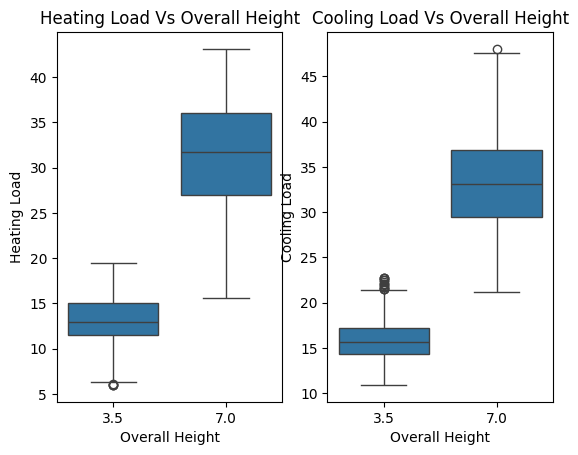

In [ ]:
#relationship between categorical features and target values

x_axis = "Overall Height"
fig, ax=plt.subplots(nrows=1, ncols=2)
sns.boxplot(data=df_energy, x=x_axis, y= "Heating Load", ax=ax[0])
ax[0].set_title("Heating Load Vs Overall Height") #set title for axis 0

sns.boxplot(data=df_energy, x=x_axis, y="Cooling Load", ax=ax[1])
ax[1].set_title("Cooling Load Vs Overall Height") #set title for axis 1



The Overall Height of the building relationhip with the Heating/Cooling load shows that the higher building needs more Cooling/Heating Load than buildings with smaller height.


<Figure size 1000x1000 with 0 Axes>

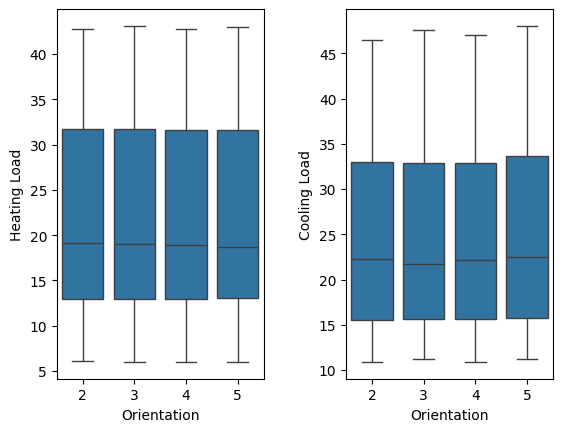

In [ ]:
#relationship between categorical features, orientation and target values
plt.figure(figsize=(10,10))
fig, ax=plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(wspace=0.4)
sns.boxplot(data=df_energy, x="Orientation", y= "Heating Load", ax=ax[0])
sns.boxplot(data=df_energy, x="Orientation", y="Cooling Load", ax=ax[1]);

**Key Obseravtion**

There is no visible relationship between the Orientation of the building and the Cooling/Heating load of a building.

**Insight**

Irrespective of the position of the building position of the buildings in this dataset, the heating/cooling load reamins the same for different buildings.

This `Orientation` feature should be dropped during modelling.

In [ ]:
# df_energy.drop("Orientation", axis=1, inplace=True)

<Figure size 2400x1200 with 0 Axes>

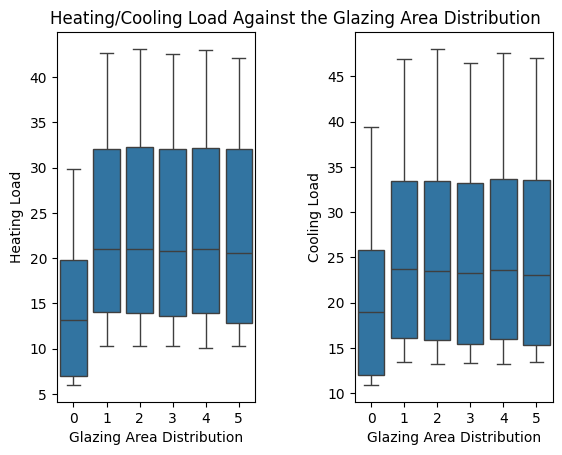

In [ ]:
#relationship between Glazing Area Distribution and target values
plt.figure(figsize=(24,12))
fig, ax=plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(wspace=0.5)
sns.boxplot(data=df_energy, x="Glazing Area Distribution", y= "Heating Load", ax=ax[0])
sns.boxplot(data=df_energy, x="Glazing Area Distribution", y="Cooling Load", ax=ax[1])
plt.title("Heating/Cooling Load Against the Glazing Area Distribution", x = -0.3);

From the plot of the Heating Load vs the Glazing Area Distribution, it is seen that the cooling load and heating load is affected either when the Glazing Area Distribution is zero or  greater than 0.

The feature will be binned to have a value of 0 and 1 to reduce dimensionality

In [ ]:
df_energy["Glazing Area Distribution"].replace({0:0,1:1,2:1,3:1,4:1,5:1}, inplace=True)

<ipython-input-22-82b75404122a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_energy["Glazing Area Distribution"].replace({0:0,1:1,2:1,3:1,4:1,5:1}, inplace=True)


<Figure size 2000x1000 with 0 Axes>

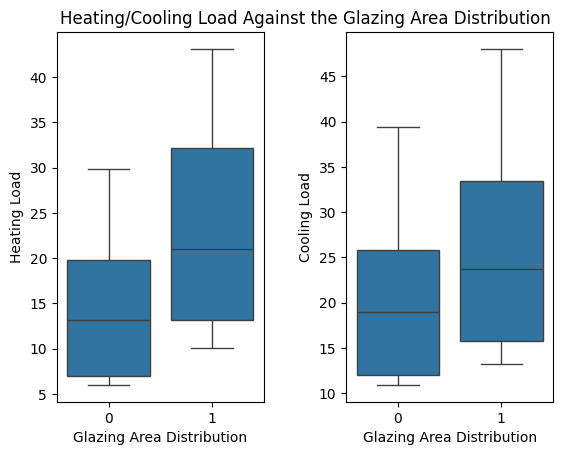

In [ ]:
#plotting to show the relationship
plt.figure(figsize=(20,10))
fig, ax=plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(wspace=0.4)
sns.boxplot(data=df_energy, x="Glazing Area Distribution", y= "Heating Load", ax=ax[0])
sns.boxplot(data=df_energy, x="Glazing Area Distribution", y="Cooling Load", ax=ax[1])
plt.title("Heating/Cooling Load Against the Glazing Area Distribution", x=-0.2);

In [ ]:
def Scatter_plots(
    *,
    data: pd.DataFrame,
    features: list,
    n_rows: int,
    n_cols: int,
    figsize: tuple = (15, 8),
    y
) -> "Plot":
    """This returns a box plot of all the specified features."""
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)

    for idx, feat in enumerate(features):
        if n_rows > 1:
            ax = axs[(idx // n_cols), (idx % n_cols)]
        else:
            ax = axs[idx]

        sns.scatterplot(data=data, x=feat, ax=ax, y=y)

        slope, intercept = np.polyfit(data[feat], data[y], 1) #get the slope and intercept of the line

        line_of_best_fit = slope * data[feat] + intercept   #get the y vectors

        sns.lineplot(data, x=feat, y=line_of_best_fit, label="Line of best fit", ax=ax) #plot the line of best fit

        ax.set_title(f"Scatter Plot of \n{feat!r} vs {y!r}")

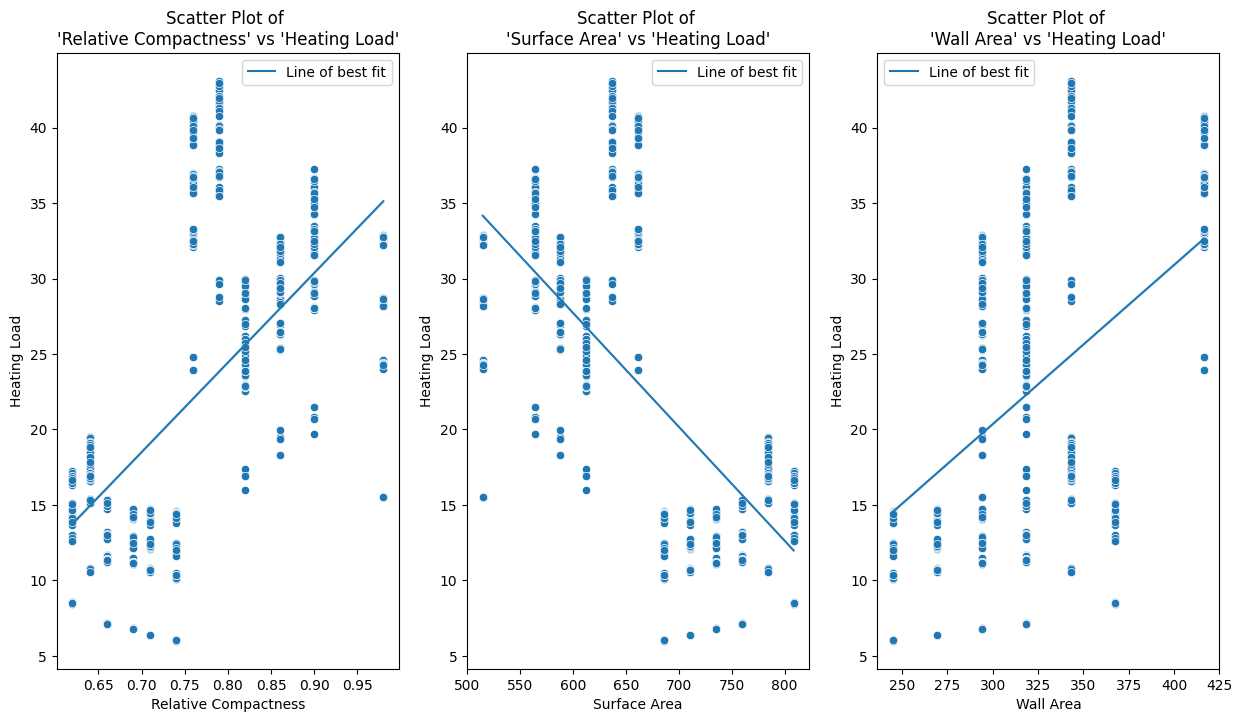

In [ ]:
#checking for linear relationship between features and target variables
numerical_features=["Relative Compactness","Surface Area", "Wall Area"]
Scatter_plots(data=df_energy, features=numerical_features,n_rows=1,n_cols=3,y="Heating Load")

The scatter plots between the Cooling/Heating Load against some of the features shows that there is a correlation beteen the features and the Heating/Cooling load but it is not so clear because there are a lot of repeating values in the feature columns. The Pearson correlation coefficient will be used to measure the linear correlation between numerical variables to get more insight.

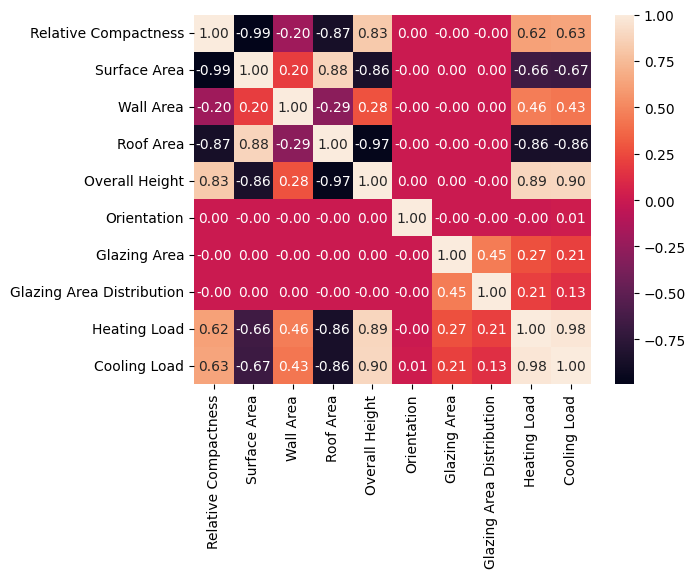

In [ ]:
#get the pearson correlation values of the data
corr=df_energy.corr(method = 'pearson')
corr

#using heatmap to visulize the pearson correlation between variables
sns.heatmap(corr, annot=True,fmt=".2f");

**Key Observations**

*Relationship between Features and Target Variables*

-The most correlated features with the target variables are `Roof Area`, `Overall Height` with negative and positive correlation respectively.
-`Surface Area` has a slightly negative correlation with the target variable
-  `Orientation` , `Wall Area`, `Grazing Area`, `Grazing Area Distribution` have very low correlation with the target



*Relationship between Features*

- `Surface Area` and `Relative Compactness` have very high negative correlation of 0.99
- `Wall Area` has low correlation with other features
- `Orientation` has zero or almost zero correlation with other features


*Relationship between Targets*

- Cooling Load and Heating Load are highly correlated

**Insights**

- The factors that can affect the Cooling/Heating Load of a building are The `Roof Area`, and `Overall Height`, `Relative Compactness` and `Surface Area`

- The heatingload and cooling load show a high correlation and also almost identical distribution so one of them can be used during modelling.

**Action**
- `Surface Area` will be dropped as it has more correlation with other features compared to `Relative Compactness`. This is done to avoid collinearity.

In [ ]:
#drop Relative Compactness
try:
    df_energy.drop("Surface Area", inplace=True, axis=1)
except Exception as e:
    print(e)
try:
    df_energy.drop("Orientation", inplace=True, axis=1)
except Exception as e:
    print(e)

print("deleted")


deleted


## Feature Engineering

Since the target variables have almost the same distribution as observed from the descriptive statistics, only one of the target variable will be used for modelling.

In [ ]:
TEST_SIZE=0.2    #test size of dataset
RANDOM_STATE=42
X=df_energy.drop(["Heating Load", "Cooling Load"], axis=1) #drop along the column
target = "Heating"
y=df_energy[f"{target} Load"]   #subset the column Cooling Load
target = target.lower()
print(target)
#split dataset into train and test set
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

X_train.shape, X_test.shape
X_train.head()



heating


,Relative Compactness,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution
60,0.820000,318.500000,147.000000,7.000000,0.100000,1
618,0.640000,343.000000,220.500000,3.500000,0.400000,1
346,0.860000,294.000000,147.000000,7.000000,0.250000,1
294,0.900000,318.500000,122.500000,7.000000,0.250000,1
231,0.660000,318.500000,220.500000,3.500000,0.100000,1


The feature engineering entails

- Scaling of the numerical features to have the same scale across the  features

In [ ]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 60 to 102
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       614 non-null    float64
 1   Wall Area                  614 non-null    float64
 2   Roof Area                  614 non-null    float64
 3   Overall Height             614 non-null    float64
 4   Glazing Area               614 non-null    float64
 5   Glazing Area Distribution  614 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 33.6 KB


In [ ]:
var_to_scale=X_train.select_dtypes(include=["float64", "int64"]).columns  #variabe to apply minmax scaler
var_to_scale


Index(['Relative Compactness', 'Wall Area', 'Roof Area', 'Overall Height',
       'Glazing Area', 'Glazing Area Distribution'],
      dtype='object')

In [ ]:
# ===== Scaler =====
scaler = MinMaxScaler()

#column transformer instantiation
col_transformer = ColumnTransformer(
    transformers=[ ("scaler", scaler, var_to_scale)],
    remainder="passthrough",
)

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', MinMaxScaler(),
                                 Index(['Relative Compactness', 'Wall Area', 'Roof Area', 'Overall Height',
       'Glazing Area', 'Glazing Area Distribution'],
      dtype='object'))])

In [ ]:
  #apply transformation to training set and test set
X_train_trans=col_transformer.fit_transform(X_train)
X_test_trans=col_transformer.transform(X_test)

In [ ]:
#view the untransformed and transformed data
X_train
# type(X_train)

,Relative Compactness,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution
60,0.820000,318.500000,147.000000,7.000000,0.100000,1
618,0.640000,343.000000,220.500000,3.500000,0.400000,1
346,0.860000,294.000000,147.000000,7.000000,0.250000,1
294,0.900000,318.500000,122.500000,7.000000,0.250000,1
231,0.660000,318.500000,220.500000,3.500000,0.100000,1
...,...,...,...,...,...,...
71,0.760000,416.500000,122.500000,7.000000,0.100000,1
106,0.860000,294.000000,147.000000,7.000000,0.100000,1
270,0.710000,269.500000,220.500000,3.500000,0.100000,1
435,0.980000,294.000000,110.250000,7.000000,0.250000,1


In [ ]:
#transformed train data
df_train_trans=pd.DataFrame(data=X_train_trans, columns=X_train.columns)
df_train_trans
# df_train_trans['Relative Compactness'] = np.log1p(df_train_trans['Relative Compactness'])
# df_train_trans['Wall Area'] = np.log1p(df_train_trans['Wall Area'])
# df_train_trans['Roof Area'] = np.log1p(df_train_trans['Roof Area'])


,Relative Compactness,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution
0,0.555556,0.428571,0.333333,1.000000,0.250000,1.000000
1,0.055556,0.571429,1.000000,0.000000,1.000000,1.000000
2,0.666667,0.285714,0.333333,1.000000,0.625000,1.000000
3,0.777778,0.428571,0.111111,1.000000,0.625000,1.000000
4,0.111111,0.428571,1.000000,0.000000,0.250000,1.000000
...,...,...,...,...,...,...
609,0.388889,1.000000,0.111111,1.000000,0.250000,1.000000
610,0.666667,0.285714,0.333333,1.000000,0.250000,1.000000
611,0.250000,0.142857,1.000000,0.000000,0.250000,1.000000
612,1.000000,0.285714,0.000000,1.000000,0.625000,1.000000


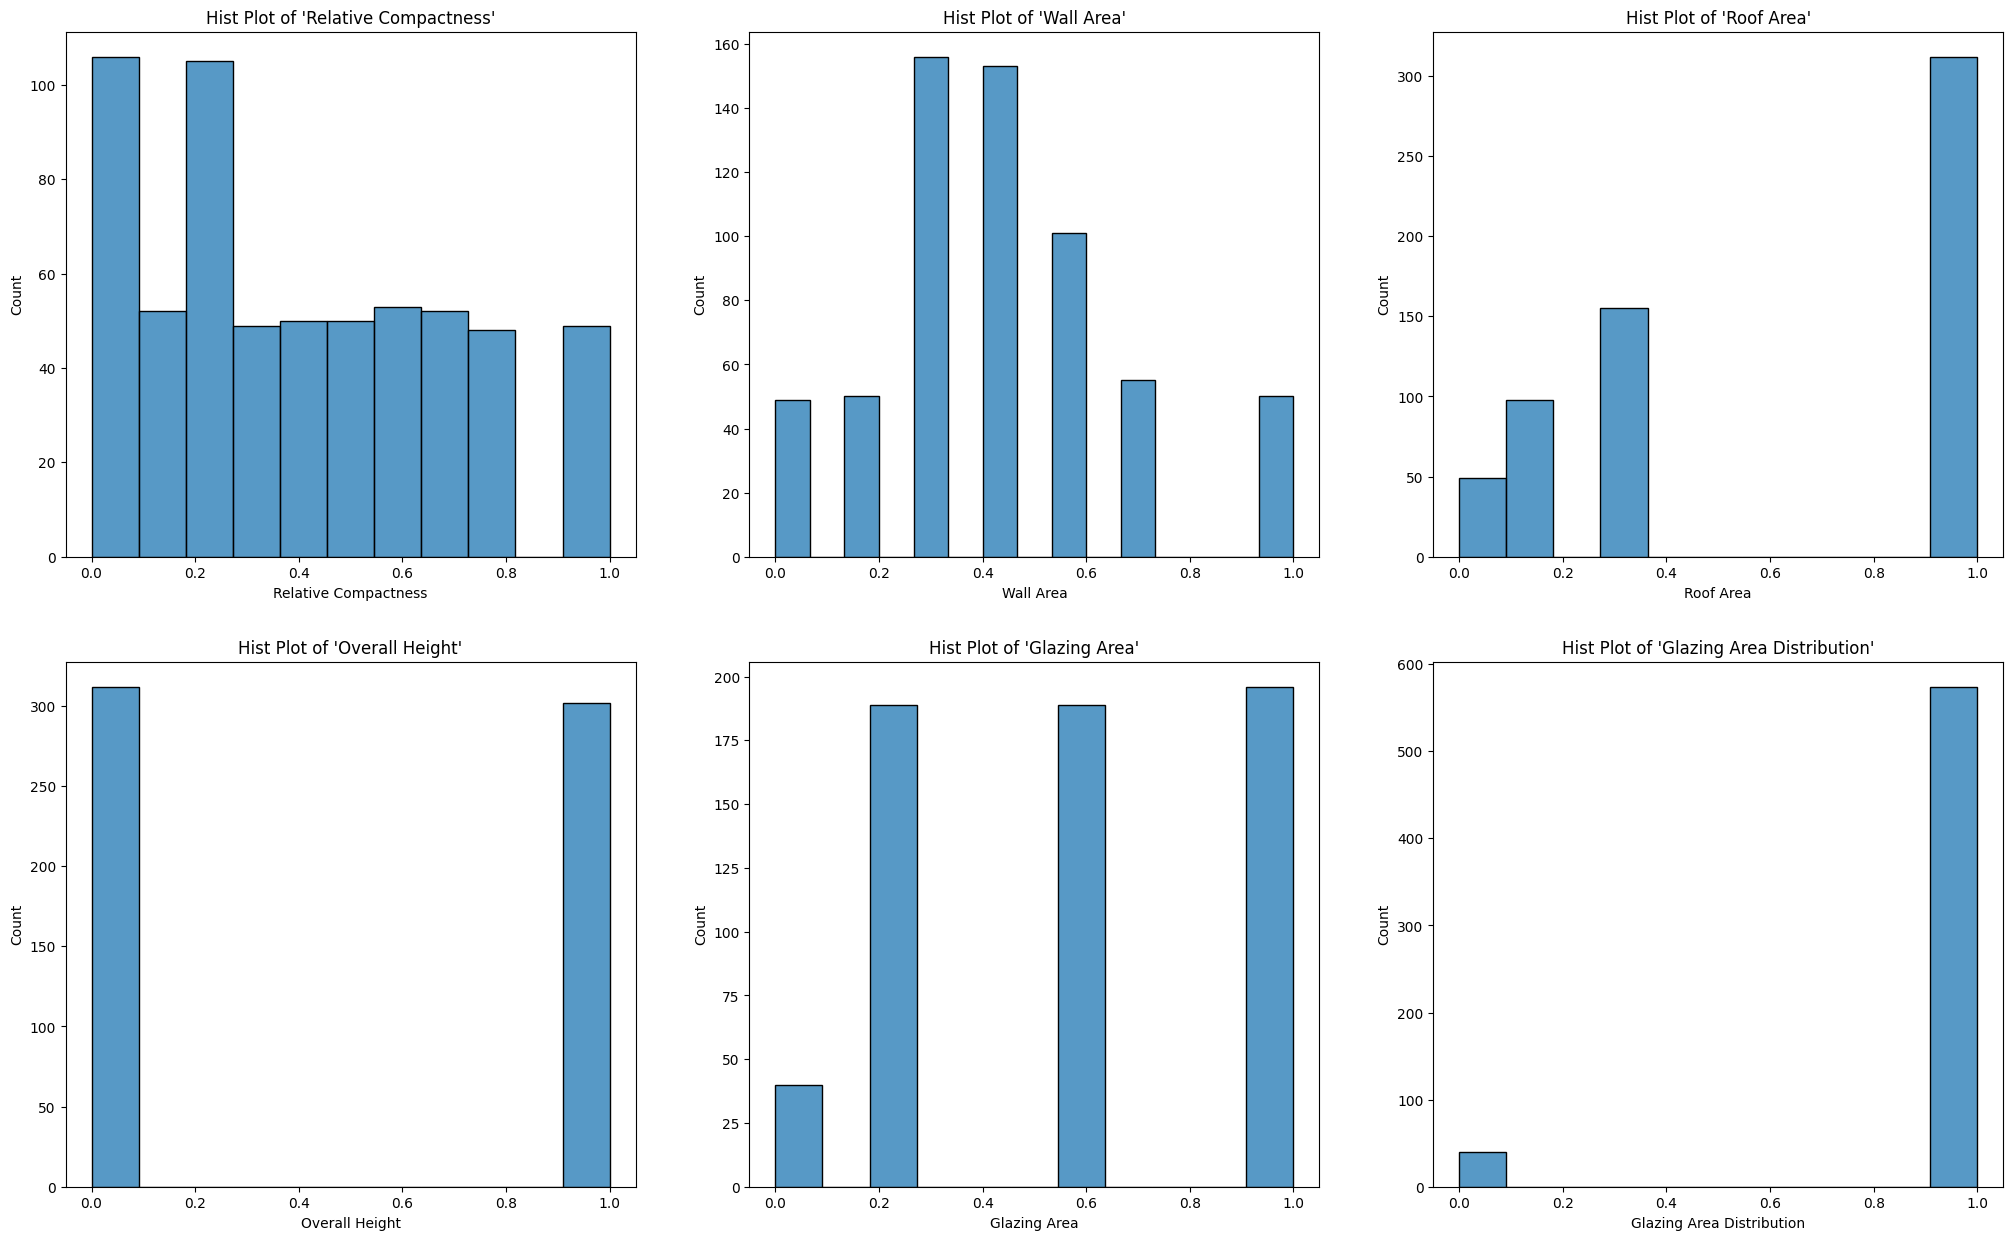

In [ ]:
Hist_plots(data=df_train_trans,features=df_train_trans.columns,n_rows=2, n_cols=3, figsize=(25,15))

In [ ]:
df_train_trans.columns

Index(['Relative Compactness', 'Wall Area', 'Roof Area', 'Overall Height',
       'Glazing Area', 'Glazing Area Distribution'],
      dtype='object')

Do số mẫu nhỏ, nên không áp dụng thêm các phép biến đổi như log, squared hay box-cox. Thêm nữa model chính sẽ là XGBoost, sẽ không yêu cầu dữ liệu phải ở phân phối chuẩn nên thêm 1 lý do để không biến đổi thêm.

## 3. MODELING


The target variable `Cooling Load` in energy dataset is a continuous variable, so this problem will be solved as a regression problem.

Based on the following criteria, the Linear Regression algorithm will be selected for the first experiment.
- Linearity: The relationship between the independent variables and the dependent variable should be approximately linear.
- Little Multicollinearity: There should be little or no relationship between the features
- Homoscedasticity: The variance of the errors should be constant across all levels of the independent variables. In other words, the spread of the residuals should remain roughly the same as you move along the regression line.

### A. Baseline Model *(just to be used as lower bound performance)*

A baseline model is a simple model with very low predictive power. It will be used as a benchmark to compare the performance of machine learning regression models.

In [ ]:
#baseline model
import numpy as np

def zero_rule_algorithm_regression(y_train, y_test):
    '''A function to calculate the prediction from a baseline model using its mean
    Params:
    y_train (pd.Dataframe): Take the target train values as input

    Return
    The predicted values i.e mean of the target values.
    '''
    prediction=np.mean(y_train)
    y_pred=[prediction]*len(y_test)
    return y_pred

#perfromance metric function

def performance_metrics(y_test, y_pred, model_name="Baseline"):
    '''Function to calculate the MSE, RMSE and MSE '''
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_pred)

    return pd.DataFrame({
        "Model": [model_name],
        "MAE": [mae],
        "MSE": [mse],
        "RMSE": [rmse],
        "R2": [r2]
    })
    # return f"Mean Absoluete Error: {mae}\n Mean Square Error: {mse}\n Root Mean Sqaured Error: {rmse}\n R2: {r2} "

In [ ]:
# Định dạng tùy chỉnh để tránh số quá dài
pd.set_option('display.float_format', lambda x: f'{x:.6f}' if abs(x) < 1e6 else f'{x:.2e}')
y_pred_baseline = zero_rule_algorithm_regression(y_train, y_test)


In [ ]:
baseline_error_y = performance_metrics(y_test, y_pred_baseline)

print("Baseline Error for y:\n ")
baseline_error_y


Baseline Error for y:
 


,Model,MAE,MSE,RMSE,R2
0,Baseline,9.272077,104.807424,10.237550,-0.005525


The errors for the baseline models are

Mean Absoluete Error: 8.7418

Mean Square Error: 93.4363

Root Mean Sqaured Error: 9.6662

R2: -0.0084

Any model that gives a value higher than these values will be considered poor.

### B. Machine learning Algorithms

ML algorithms that will be considered in this project are

- Linear Regression
- Decision Trees
- Random Forest
- XGBoost
- SVM
- KNN

First, we use GridSearch to find the best params for each algorithml.


In [ ]:
# grid search for SVM
from sklearn.model_selection import GridSearchCV
svm = SVR()

param_grid_svm = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid_svm,
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_svm.fit(X_train_trans, y_train)

svm_params = grid_search_svm.best_params_
print("Best parameters:", svm_params)
print("Best score:", grid_search_svm.best_score_)

best_svm_model = grid_search_svm.best_estimator_
y_pred_svm = best_svm_model.predict(X_test_trans)
metrics_svm = performance_metrics(y_test, y_pred_svm, model_name="SVM")
metrics_svm

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters: {'C': 10, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'poly'}
Best score: 0.9470191310949523


,Model,MAE,MSE,RMSE,R2
0,SVM,1.134330,4.478221,2.116181,0.957036


In [ ]:
# grid search for KNN

knn = KNeighborsRegressor()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # 1 = Manhattan, 2 = Euclidean
    'algorithm': ['auto']  # có thể thêm 'ball_tree', 'kd_tree'
}

grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_knn.fit(X_train_trans, y_train)

knn_params = grid_search_knn.best_params_
print("Best parameters:", knn_params)
print("Best score:", grid_search_knn.best_score_)

best_knn_model = grid_search_knn.best_estimator_
y_pred_knn = best_knn_model.predict(X_test_trans)
metrics_knn = performance_metrics(y_test, y_pred_knn, model_name="K-Nearest Neighbors")
metrics_knn

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
Best score: 0.9973252696926096


,Model,MAE,MSE,RMSE,R2
0,K-Nearest Neighbors,0.388261,0.264112,0.513918,0.997466


In [ ]:
# grid search for DECISION TREE

# Khởi tạo mô hình Decision Tree
dt = DecisionTreeRegressor(random_state=42)

# Lưới tham số để tìm kiếm
param_grid_dt = {
    'max_depth': [None, 5, 10, 20],              # Độ sâu tối đa của cây
    'min_samples_split': [2, 5, 10],             # Số mẫu tối thiểu để chia một nút
    'min_samples_leaf': [1, 2, 4],               # Số mẫu tối thiểu ở một nút lá
    'max_features': [None, 'sqrt', 'log2']       # Số đặc trưng xem xét khi chia
}

# Thiết lập GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=3,                    # 3-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Fit vào tập train
grid_search_dt.fit(X_train_trans, y_train)

# Lưu lại tham số tốt nhất
dt_params = grid_search_dt.best_params_
print("Best parameters:", dt_params)
print("Best score:", grid_search_dt.best_score_)

# Đánh giá mô hình tốt nhất
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test_trans)
metrics_dt = performance_metrics(y_test, y_pred_dt, model_name="Decision Tree")
metrics_dt

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.9969393078225092


,Model,MAE,MSE,RMSE,R2
0,Decision Tree,0.372708,0.251774,0.501770,0.997584


In [ ]:
# grid search for Random forest

# Init model
rf = RandomForestRegressor(random_state=42)


param_grid_rf = {
    'n_estimators': [100, 200],       # Số cây trong rừng
    'max_depth': [None, 10, 20],           # Độ sâu tối đa của cây (None = không giới hạn)
    'min_samples_split': [2, 5],       # Số mẫu tối thiểu để chia 1 nút
    'min_samples_leaf': [1, 2 ],         # Số mẫu tối thiểu ở 1 nút lá
    'max_features': [None, 'sqrt'],        # Số đặc trưng dùng khi chia nhánh
    'bootstrap': [True]             # Có dùng bootstrap khi lấy mẫu không
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=3,                    # 3-fold cross-validation
    verbose=2,
    n_jobs=-1,
)

grid_search.fit(X_train_trans, y_train)
rf_params = grid_search.best_params_        # save params to create baseline model
print("Best parameters:", rf_params)
print("Best score:", grid_search.best_score_)

# evaluate
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test_trans)
metrics_rf = performance_metrics(y_test, y_pred, model_name="Random Forest")
metrics_rf


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.9972572946803792


,Model,MAE,MSE,RMSE,R2
0,Random Forest,0.377001,0.252026,0.502022,0.997582


In [ ]:
# grid search for xgboost
from sklearn.model_selection import GridSearchCV

# Khởi tạo mô hình XGBoost Regressor
grid_model = XGBRegressor()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [1, 2],
    'learning_rate': [0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.5, 0.8],
    'min_child_weight': [3, 5],
}


# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=grid_model,
                           param_grid=param_grid,
                           cv=3,                    # 2-fold cross-validation
                           scoring='neg_mean_squared_error',  # Đánh giá bằng MSE âm
                           n_jobs=-1,               # Sử dụng tất cả CPU
                           verbose=1)               # Hiển thị tiến trình

# train grid searh
grid_search.fit(X_train_trans, y_train)

# print results
xgb_params = grid_search.best_params_       # save params to create baseline model
print("Best params: ", xgb_params)
print("Best negative MSE", grid_search.best_score_)

# evaluate
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test_trans)
metrics_xgb = performance_metrics(y_test, y_pred, model_name="XGBoost")
metrics_xgb


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best params:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.8}
Best negative MSE -0.26607867318301665


,Model,MAE,MSE,RMSE,R2
0,XGBoost,0.384367,0.282981,0.531960,0.997285


In [ ]:
# grid search for regression


lr = LinearRegression(fit_intercept=True)

lr.fit(X_train_trans, y_train)
y_pred_lr = lr.predict(X_test_trans)
metrics_lr = performance_metrics(y_test, y_pred_lr, model_name="Linear Regression")
metrics_lr


,Model,MAE,MSE,RMSE,R2
0,Linear Regression,2.030285,7.997766,2.828032,0.923269


In [ ]:
# summarize models

models = {
    "Linear Regression": lr,
    "SVM": best_svm_model,
    "K-Nearest Neighbors": best_knn_model,
    "Decision Tree": best_dt_model,
    "XGBoost": best_xgb_model,
    "Random Forest": best_rf_model,
}

base_models_performance = pd.concat(
    [metrics_lr, metrics_dt, metrics_rf, metrics_svm, metrics_xgb, metrics_knn],
    axis=0
).sort_values(by="R2", ascending=False)


In [ ]:
#train and evaluate different regression models
def train_and_evaluate_models(X_train,X_test, y_train, y_test):
    # Initialize different regression models
    models = [
    ("Linear Regression", LinearRegression(fit_intercept=True)),
    ("SVM", SVR(**svm_params)),
    ("K-Nearest Neighbors", KNeighborsRegressor(**knn_params)),
    ("XGBoost", XGBRegressor(**xgb_params, random_state=42)),
    ("Random Forest", RandomForestRegressor(**rf_params, random_state=42)),
    ("Decision Tree", DecisionTreeRegressor(**dt_params, random_state=42)),
    ]

    #Create lists to store the results
    models_dict = {}
    metrics_df = pd.DataFrame()

    # Fit and evaluate each model
    for model_name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        models_dict[model_name] = model
        metrics = performance_metrics(y_test, y_pred, model_name)
        metrics_df = pd.concat([metrics_df, metrics], axis=0)

    return metrics_df, models_dict


In [ ]:
# models_eval, models = train_and_evaluate_models(X_train_trans,X_test_trans,y_train, y_test)
# regression_models_performances = pd.concat([models_eval, baseline_error_y], axis=0)
# regression_models_performances.sort_values(by="R2", ascending=False)

In [ ]:
# compare with performance of unpreprocessed data (SVM has lower R2)

# models_eval, models = train_and_evaluate_models(X_train,X_test,y_train, y_test)
# regression_models_performances = pd.concat([models_eval, baseline_error_y], axis=0)
# regression_models_performances

### C. Save model and analize features importance

In [ ]:

# save models
import pickle
with open(f"{target}.pkl", "wb") as f:
    pickle.dump(models, f)

with open("col_transformer.pkl", "wb") as f:
    pickle.dump(col_transformer, f)

Observation:

The performance of model when trained with both transformed and untransformed data gives the same result. This could be because there is no extreme variations between the features.

All the models performed better than the baseline model. The model with the highest performance are

1. Decision Tree
2. Random Forest
3. XGBoost

- All three models are tree-based models and they exhibit lower Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Mean Squared Error (MSE), along with higher R-squared (R2) values, indicating their strong predictive performance on the dataset.

- While Linear Regression has reasonably good performance, it shows slightly higher MAE, RMSE, and MSE compared to the tree-based models.The R2 value is also high, indicating a good fit, but it's slightly lower than that of the tree-based models.

- SVM has a higher MAE, RMSE, and MSE, and a lower R2 compared to the tree-based models. It seems to be less accurate in this particular case.


- K-Nearest Neighbors also exhibits higher MAE, RMSE, and MSE, and a lower R2, suggesting it may not be as well-suited for this dataset.

This shows that there are non-linear relationships in the datasets as Tree-based models are best for capturing these type of patterns in a dataset, i.e relationship between input variables and the target is not well-described by linear models


In [ ]:

# feature importance from trained models
rf_feature_importance = models["Random Forest"].feature_importances_
xgb_feature_importance = models["XGBoost"].feature_importances_
dt_feature_importance = models["Decision Tree"].feature_importances_

In [ ]:
#feature importance
feat_import=pd.DataFrame(columns=X_train.columns, data=[dt_feature_importance,rf_feature_importance,xgb_feature_importance],index=["Decision Tree", "Random forest", "Xgboost"])
feat_import

,Relative Compactness,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution
Decision Tree,0.891803,0.016012,0.003026,0.000000,0.079544,0.009615
Random forest,0.490753,0.049385,0.219461,0.150760,0.077958,0.011684
Xgboost,0.386726,0.042577,0.255870,0.180348,0.086311,0.048168


<ipython-input-86-843b2004dc16>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=7)  # Set x-axis tick label font size
<ipython-input-86-843b2004dc16>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=7)  # Set x-axis tick label font size
<ipython-input-86-843b2004dc16>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=7)  # Set x-axis tick label font size


<Figure size 1500x1000 with 0 Axes>

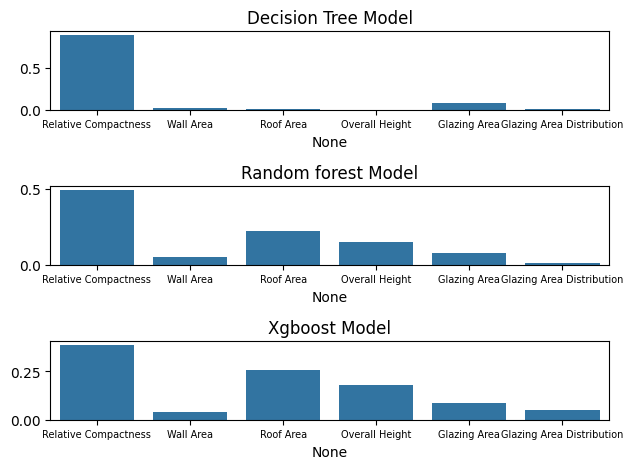

In [ ]:
plt.figure(figsize=(15,10))
fig,ax=plt.subplots(nrows=3, ncols=1)
models_names=["Decision Tree", "Random forest", "Xgboost"]
feat_import=[dt_feature_importance,rf_feature_importance,xgb_feature_importance]
for i,model in enumerate(models_names):
    sns.barplot( y=feat_import[i], x=X_train.columns,ax=ax[i])
    ax[i].set_title(f"{model} Model")
    ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=7)  # Set x-axis tick label font size

plt.tight_layout()  #adjust spacing between subplots to minimize the overlaps.

------------------

**Decision Tree:**

`Relative Compactness` has the highest importance score (0.836), indicating it is the most important feature in the Decision Tree model. It has a strong impact on the model's decisions.

`Glazing Area` is the next most important feature (0.048), but its importance is considerably lower than Relative Compactness.

`Wall Area` and `Roof Area` have relatively low importance scores (0.102 and 0.010, respectively).

`Overall Height` and `Glazing Area Distribution` have the lowest importance scores (close to 0), suggesting they have little impact on the model's decisions.

------------------

**Random Forest:**

`Relative Compactness` still has the highest importance (0.418), but its importance is relatively lower than in the Decision Tree.

`Overall Height` is the second most important feature (0.346) in the Random Forest model, which suggests it has a significant influence.

`Roof Area` and `Wall Area` have moderate importance scores (0.103 and 0.079, respectively).

`Glazing Area` and` Glazing Area Distribution` have lower importance scores compared to other features, but they are not negligible.

------------------

**XGBoost:**

`Relative Compactness` is the dominant feature in the XGBoost model (0.959), indicating that it plays a crucial role in making predictions.

`Glazing Area` is the second most important feature (0.031), but its importance is considerably lower than Relative Compactness.

`Wall Area`, `Roof Area`, and `Glazing Area Distribution` have negligible importance scores (close to 0), suggesting they do not significantly influence the model's decisions.

Though the feature importance across the three models differs for the features, the most important feature is the Relative Compactness and the less important feature is the

## CONCLUSION

In this notebook, different models were explored for the prediction the cooling energy consumption in residential building. Tree-based models performed better amongst other regression models.

## RECOMMENDATION

A more robust and diverse dataset will give a better model that can predict cooling energy consumption for different types of residential buildings. The predictions can be used in the design and sizing of HVAC systems in buildings. There were a lot of repeating values in th

# **ACTIVE LEARNING**


## **Error based sampling**

In [ ]:
# function to find unsure samples
def find_unsure_samples(model, X_test, y_test, num_of_samples):
    y_preds = model.predict(X_test)
    unsure_indices = []
    residuals = (y_test - y_preds)**2
    sorted_indices = np.argsort(residuals)
    for idx in sorted_indices[-num_of_samples:]:
        unsure_indices.append(idx)
    return unsure_indices # return indices of the most unsure samples

# active learning

def active_learning(model, X_train, y_train, X_test, y_test, n_rounds=3, n_samples=3):
    for i in range(n_rounds):
        # query unsure samples
        unsure_samples = find_unsure_samples(model, X_test, y_test, n_samples)
        print(f"\t found: {unsure_samples}")

        # choose samples from X and y
        y_unsure_samples = np.array(y_test)[unsure_samples]
        X_unsure_samples = X_test[unsure_samples]

        # delete chosen samples from test data
        X_test = np.delete(X_test, unsure_samples, axis=0)
        y_test = np.delete(y_test, unsure_samples, axis=0)

        # add samples to train data
        X_train_AL = np.concatenate((X_train, X_unsure_samples), axis=0)
        y_train_AL = np.concatenate((y_train, y_unsure_samples), axis=0)

        # retrain model
        model.fit(X_train_AL, y_train_AL)

    return model

model = models['XGBoost']
unsure_samples = find_unsure_samples(model, X_test_trans, y_test, 3)

print(unsure_samples)
print(X_test_trans[unsure_samples])
print(np.array(y_test)[unsure_samples])





[77, 57, 85]
[[0.55555556 0.42857143 0.33333333 1.         0.625      1.        ]
 [0.55555556 0.42857143 0.33333333 1.         0.625      1.        ]
 [0.25       0.14285714 1.         0.         1.         1.        ]]
[24.7  24.6  12.43]


In [ ]:
# clone models and active learning
import copy
models_AL = copy.deepcopy(models)

# compare predicted results before and after AL of XGBoost
temp_ = models_AL['XGBoost']
temo = models['XGBoost']
temp_pred = temp_.predict(X_test_trans)
temo_pred = temo.predict(X_test_trans)
compare = np.sum((temp_pred - temo_pred)**2)
print(f"Before active learning: {compare}\n")

# start active learning
for name, model in (models_AL.items()):
    print(f"Current model: {name}")
    X_test_clone = X_test_trans.copy()
    y_test_clone = y_test.copy()
    model = active_learning(model, X_train_trans, y_train, X_test_clone, y_test_clone, n_rounds=3, n_samples=4)

# compare
temp_ = models_AL['XGBoost']
temo = models['XGBoost']
temp_pred = temp_.predict(X_test)
temo_pred = temo.predict(X_test)
compare = np.sum((temp_pred - temo_pred)**2)
print(f"\nAfter active learning: {compare}")

Before active learning: 0.0

Current model: Linear Regression
	 found: [57, 81, 53, 137]
	 found: [np.int64(37), np.int64(63), np.int64(85), np.int64(75)]
	 found: [np.int64(60), np.int64(84), np.int64(23), np.int64(99)]
Current model: SVM
	 found: [106, 91, 77, 57]
	 found: [np.int64(75), np.int64(27), np.int64(20), np.int64(62)]
	 found: [np.int64(26), np.int64(69), np.int64(31), np.int64(5)]
Current model: K-Nearest Neighbors
	 found: [97, 33, 119, 85]
	 found: [np.int64(139), np.int64(65), np.int64(14), np.int64(103)]
	 found: [np.int64(130), np.int64(118), np.int64(98), np.int64(92)]
Current model: Decision Tree
	 found: [33, 14, 119, 85]
	 found: [np.int64(146), np.int64(75), np.int64(103), np.int64(55)]
	 found: [np.int64(98), np.int64(91), np.int64(130), np.int64(118)]
Current model: XGBoost
	 found: [119, 77, 57, 85]
	 found: [np.int64(121), np.int64(146), np.int64(118), np.int64(14)]
	 found: [np.int64(130), np.int64(9), np.int64(63), np.int64(84)]
Current model: Random Fores

In [ ]:
AL_models_performances = pd.DataFrame()
for name, model in (models_AL.items()):
    y_preds = model.predict(X_test_trans)
    metrics = performance_metrics(y_test, y_preds, model_name=name)
    AL_models_performances = pd.concat([AL_models_performances, metrics], axis=0)

AL_models_performances.sort_values(by="R2", ascending=False)


,Model,MAE,MSE,RMSE,R2
0,Random Forest,0.374792,0.247919,0.497915,0.997621
0,Decision Tree,0.371520,0.248753,0.498752,0.997613
0,K-Nearest Neighbors,0.384964,0.260240,0.510137,0.997503
0,XGBoost,0.383432,0.277101,0.526403,0.997341
0,SVM,1.138224,4.369622,2.090364,0.958078
0,Linear Regression,2.029943,8.026785,2.833158,0.922991


In [ ]:
base_models_performance.sort_values(by="R2", ascending=False)

,Model,MAE,MSE,RMSE,R2
0,Decision Tree,0.372708,0.251774,0.501770,0.997584
0,Random Forest,0.377001,0.252026,0.502022,0.997582
0,K-Nearest Neighbors,0.388261,0.264112,0.513918,0.997466
0,XGBoost,0.384367,0.282981,0.531960,0.997285
0,SVM,1.134330,4.478221,2.116181,0.957036
0,Linear Regression,2.030285,7.997766,2.828032,0.923269


## **AL with XGBoost + Dropout sampling**

In [ ]:
# simulate dropout with xgboost model
def dropout_predict(model, X_pool, n_iters=20, dropout_ratio=0.2):
    n_trees = model.n_estimators
    kept_trees = int(n_trees * (1 - dropout_ratio))
    all_preds = []

    for _ in range (n_iters):
        start = np.random.randint(0, n_trees - kept_trees)
        selected_trees = np.arange(start, start + kept_trees)
        preds = model.predict(X_pool, iteration_range=selected_trees)
        all_preds.append(preds)

    all_preds = np.array(all_preds)
    mean_preds = np.mean(all_preds, axis=0)
    std_preds = np.std(all_preds, axis=0)

    return mean_preds, std_preds

# choose samples with highest std
def query_uncertain_sample(std_preds, n_samples):
    return np.argsort(std_preds)[-n_samples:]

# Active learning loop
def active_learning_xgboost(model, X_train, y_train, X_pool, y_pool, n_rounds=5, n_samples=5):
    for round in range(n_rounds):
        print(f"Round {round + 1}/{n_rounds}")
        _, std_preds = dropout_predict(model, X_pool, n_iters=30, dropout_ratio=0.2)
        unsure_indices = query_uncertain_sample(std_preds, n_samples)
        print(f"selected: {unsure_indices}")

        # query unsure samples from X_pool
        x_new = X_pool[unsure_indices]
        y_new = y_pool[unsure_indices]

        # add to X_train
        X_train_AL = np.concatenate((X_train, x_new), axis=0)
        y_train_AL = np.concatenate((y_train, y_new), axis=0)

        # delete from X_pool
        # X_pool = np.delete(X_pool, unsure_indices, axis=0)
        # y_pool = np.delete(y_pool, unsure_indices, axis=0)

        # update model
        model.fit(X_train_AL, y_train_AL)

    return model


In [ ]:
# clone model and X_test, y_test
xgboost_ds = copy.deepcopy(models['XGBoost'])
X_pool = X_test_trans.copy()
y_pool = np.array(y_test.copy())

xgboost_ds = active_learning_xgboost(xgboost_ds, X_train_trans, y_train, X_pool, y_pool, n_rounds=5, n_samples=5)

y_preds_ds = xgboost_ds.predict(X_test_trans)
metrics = performance_metrics(y_test, y_preds_ds, model_name="XGBoost DS")
metrics



Round 1/5
selected: [110  19  11 131 122]
Round 2/5
selected: [ 15  87  59  94 122]
Round 3/5
selected: [110  19  11 131 122]
Round 4/5
selected: [110  19  11 131 122]
Round 5/5
selected: [110  19  11 131 122]


,Model,MAE,MSE,RMSE,R2
0,XGBoost DS,0.383093,0.278634,0.527858,0.997327


In [ ]:
with open(f"{target}_AL.pkl", "wb") as f:
    pickle.dump(models_AL, f)
with open(f"{target}_xgb.pkl", "wb") as f:
    pickle.dump(xgboost_ds, f)

The performance is improved, but still lower than **Error based sampling**.